In [1]:
from easyocr import Reader
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import re

In [3]:
# PARAMTERI
languages_list = ['en']
print(languages_list)

gpu = False

['en']


In [17]:
img = cv2.imread("../images/file_0.jpg")
img = cv2.resize(img, None, fx=0.5, fy=0.5)
cv2.imshow('Resized', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
img = cv2.imread("../images/file_0.jpg")
img = cv2.resize(img, None, fx=0.5, fy=0.5)
median_filtered = cv2.medianBlur(img, 5)

# Save or display the result
cv2.imshow('Median Filtered', median_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
img = cv2.imread("../images/file_0.jpg")
img = cv2.resize(img, None, fx=0.5, fy=0.5)
gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 0)

# Save or display the result
cv2.imshow('Gaussian Filtered', gaussian_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [83]:
img = cv2.imread("../images/file_5.jpg")
img = cv2.resize(img, None, fx=0.5, fy=0.5)
bilateral_filtered = cv2.bilateralFilter(img, 9, 75, 75)

# Save or display the result
cv2.imshow('Bilateral Filtered', bilateral_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [74]:
img = cv2.imread("../images/file_2.jpg")
img = cv2.resize(img, None, fx=0.5, fy=0.5)
_, binary_global = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)

# Display the result
cv2.imshow('Global Thresholding', binary_global)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [75]:
binary_image = binary_global

In [51]:
original = img.copy()

In [76]:
reader = Reader(languages_list, gpu)
results = reader.readtext(binary_image)


Using CPU. Note: This module is much faster with a GPU.


In [77]:
for result in results:
    print(result[1])

2o1o
#'
1048,7,8 8
09
INtECH
m.431
5970
Kod


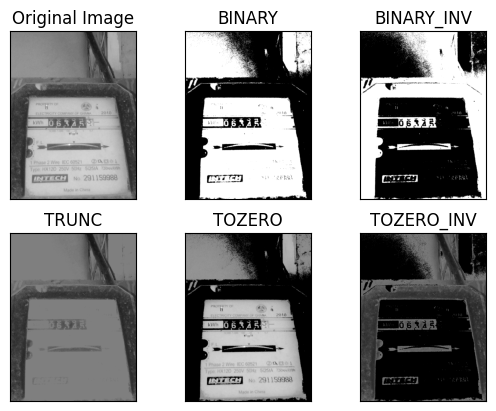

In [88]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
image_path = '../images/file_0.jpg'

img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
 
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()

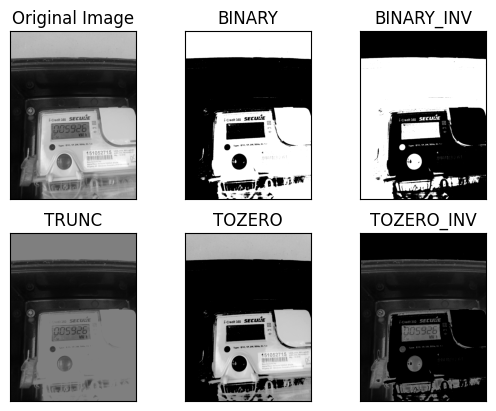

In [89]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
image_path = '../images/file_1.jpg'

img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
 
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()

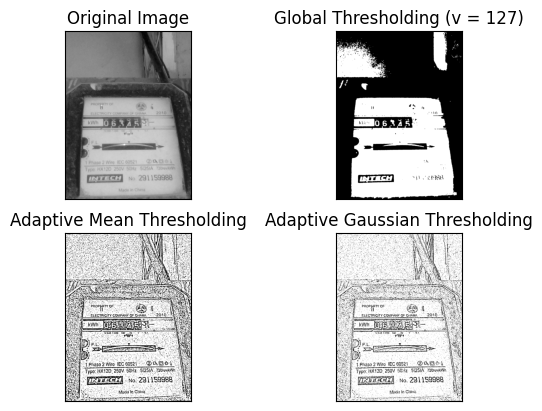

In [96]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
image_path = '../images/file_0.jpg'

img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
 
ret,th1 = cv.threshold(img,140,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

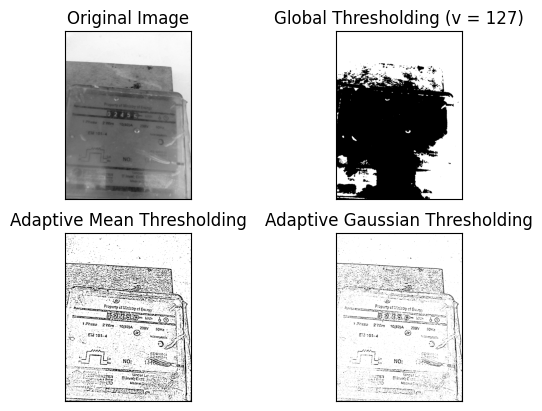

In [107]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
image_path = '../images/file_3.jpg'

img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
 
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [106]:
reader = Reader(languages_list, gpu)
for idx, i in enumerate(images):
    results = reader.readtext(i)
    print("Result for: ", titles[idx])
    print(results[idx])


Using CPU. Note: This module is much faster with a GPU.


Result for:  Original Image
([[216, 684], [345, 684], [345, 727], [216, 727]], '3', 0.021801694012801853)
Result for:  Global Thresholding (v = 127)
([[315, 755], [663, 755], [663, 865], [315, 865]], 'J0 4,91,8}', 0.4265981510121471)
Result for:  Adaptive Mean Thresholding
([[784, 691], [890, 691], [890, 739], [784, 739]], '2010', 0.9999980926513672)
Result for:  Adaptive Gaussian Thresholding
([[206, 767], [290, 767], [290, 820], [206, 820]], 'Wh', 0.9954751682894369)


In [21]:
import cv2
import numpy as np

def preprocess_image(image, meter_type):
    if meter_type == 'analog':
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        # Edge detection
        edges = cv2.Canny(blurred, 50, 150)
        return edges

    elif meter_type == 'digital':
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Apply thresholding
        _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
        # Morphological operations
        kernel = np.ones((3, 3), np.uint8)
        cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
        return cleaned

    else:
        raise ValueError("Unsupported meter type")

# Example usage
image = cv2.imread('../images/file_17.jpg')
meter_type = 'digital'  # 'analog' or 'digital'
processed_image = preprocess_image(image, meter_type)
cv2.imshow('Processed Image', processed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

meter_type = 'analog'  # 'analog' or 'digital'
processed_image = preprocess_image(image, meter_type)
cv2.imshow('Processed Image', processed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()